In [21]:
import pandas as pd
import sys
sys.path.insert(0, '/home/toque/work/forecast/utils/')
import utils
import utils_date

import matplotlib.pyplot as plt

# DATA

In [2]:
obs = pd.read_csv('/home/toque/data2/montreal/stm/data/valid_metro_15min_2015_2016_2017_sumpass_aggdaily.csv')
sarimax_pred = pd.read_csv('/home/toque/data2/forecast/model/sarimax/predict/sarimax_stm_aggday/2017-01-01_2018-01-01.csv')

In [7]:
start = '2017-01-01'
end = '2018-01-01'
date_list = utils_date.get_list_common_date(start, end, obs, [sarimax_pred])

# SARIMAX

In [12]:
score_rmse_sarimax = utils.rmse(obs.set_index('Datetime').loc[date_list].values.flatten(), sarimax_pred.set_index('Datetime').loc[date_list].values.flatten())
print ('Score RMSE SARIMAX : {:.2f}'.format(score_rmse_sarimax))

Score RMSE SARIMAX : 1655.88


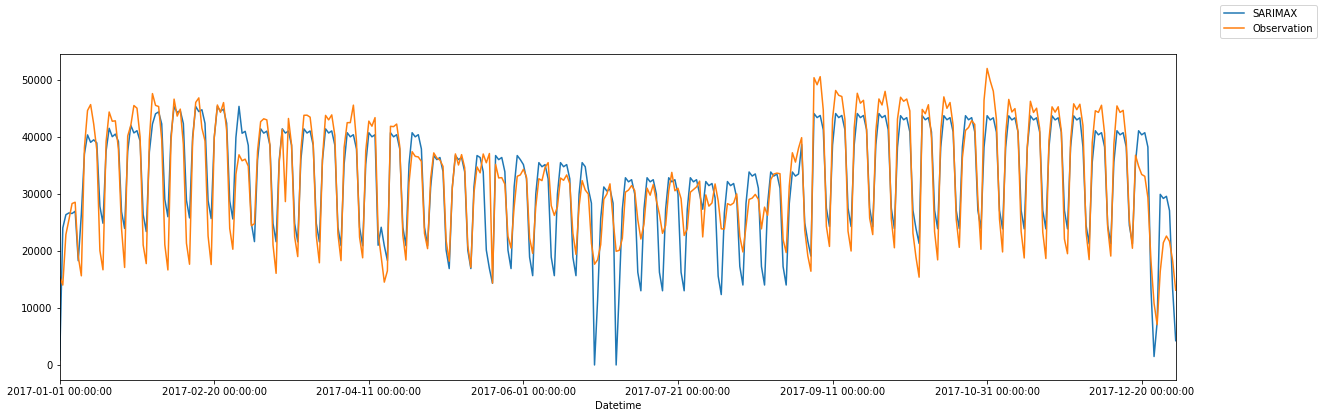

In [16]:
fig, ax = plt.subplots(figsize = (20,6))
sarimax_pred.set_index('Datetime').loc[date_list]['11'].plot(ax=ax)
obs.set_index('Datetime').loc[date_list]['11'].plot(ax=ax)
fig.legend(['SARIMAX', 'Observation'])
plt.show()

In [23]:
sarimax_model = utils.load_pickle('/home/toque/data2/forecast/model/sarimax/optimize/sarimax_stm_aggday/sarimax_stm_aggday/model_infos.pkl')
grid_search = utils.load_pickle('/home/toque/data2/forecast/model/sarimax/optimize/sarimax_stm_aggday/grid_search.pkl')

In [20]:
sarimax_model['param_grid']

{'D_params': [0],
 'P_params': [0, 1, 7],
 'Q_params': [0],
 'd_params': [0],
 'm_params': [0, 1, 7],
 'p_params': [0, 7, 11],
 'q_params': [0, 1],
 't_params': ['c', 'ct']}

In [36]:
import numpy as np
param_score = [(i,np.mean(grid_search['1'][i])) for i in grid_search['1'].keys()]
print('best param: {}'.format(sorted(param_score, key =lambda x: x[1] )[0]))

best param: ("[(0, 0, 0), (1, 0, 0, 7), 'ct']", 1294.1627358518479)


Le modèle SARIMAX même une fois optimisé obtient un **mauvais score (RMSE = 1655) contre 1318 pour un RF non optimisé.**  
Param grid du rf ={
    'n estimators': [100],
    'max features': ['auto'],
    'max depth': [None],
    'min samples split': [2],
    'min samples leaf': [1],
    'n jobs': [6],
    'criterion': ['mse']}